# CleanTechTag 
## (Clean Technologies Tagging) - Data Analysis
---

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data_funding = pd.read_csv('datasets/cleantechtag_joint_results.csv') #only once is need

In [11]:
data_funding.head()

,Unnamed: 0,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,...,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects
0,6,225983,875629,NAIMA,SIGNED,H2020-EU.2.1.3.;H2020-EU.2.1.2.,LC-BAT-2-2019,H2020,NA ION MATERIALS AS ESSENTIAL COMPONENTS TO MA...,2019-12-01,...,The EU is transitioning to The EU is transitio...,7999897.03,7999897.03,H2020-LC-BAT-2019,RIA,TIAMAT,FR,BIOKOL SVERIGE AB;VLAAMSE INSTELLING VOOR TECH...,SE;BE;BG;ES;FR;NL;DE;SI,NaN
1,32,226246,870245,GEOCEP,SIGNED,H2020-EU.1.3.3.,MSCA-RISE-2019,H2020,Global Excellence in Modeling Climate and Ener...,2020-10-01,...,The global GEOCEP project provides an innovati...,3036000.00,2254000.00,H2020-MSCA-RISE-2019,MSCA-RISE,UNIVERZITA KARLOVA,CZ,LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIEN...,UK;CH;IT;FR,NaN
2,39,226082,887865,SAAT2020,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Scoring crops with Agricultural Artificial int...,2019-12-01,...,"By 2050, our planet will be home to more than ...",71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,COMPUTOMICS GMBH,DE,NaN,NaN,NaN
3,40,226019,889249,BTSys,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Biosolids treatment system for transformation ...,2019-11-01,...,Global annual organic waste generation is set ...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,AGRISTARBIO - ENVIRONMENTAL SOLUTIONS LDA,PT,NaN,NaN,NaN
4,53,225952,888396,Green-Insulation,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Green-Tech Fibre Insulation,2019-12-01,...,Miljøskærm is a Danish SME having independentl...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,MILJOSKAERM APS,DK,NaN,NaN,NaN


In [57]:
data_funding.startDate = pd.to_datetime(data_funding.startDate)

In [58]:
data_funding['First_year'] = pd.DatetimeIndex(data_funding['startDate']).year

In [59]:
len(data_funding)

1732

---

### Demanded technologies

In [12]:
catalogue = pd.read_csv('datasets/cleantechtag_catalogue.csv')

In [55]:
sector_counts = pd.pivot_table(
    catalogue,
    index='id',
    columns='sector',
    aggfunc='count',
    fill_value=0)['category'].reset_index()

In [56]:
sector_counts.head(3)

sector,id,Agriculture,Buildings,Energy,Human settlements,Industry,Transport
0,633192,0,1,0,1,0,0
1,633962,0,0,0,1,1,0
2,635201,1,0,0,0,0,0


### Cost analysis (Calculating EU contribution)

In [60]:
data_funding = pd\
    .merge(data_funding, sector_counts,
             how='left', on='id')\
    .sort_values(['startDate','ecMaxContribution'], ascending=False)\
    .reset_index()

In [62]:
data_funding.head(3)

,index,Unnamed: 0,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,...,participants,participantCountries,subjects,First_year,Agriculture,Buildings,Energy,Human settlements,Industry,Transport
0,1,32,226246,870245,GEOCEP,SIGNED,H2020-EU.1.3.3.,MSCA-RISE-2019,H2020,Global Excellence in Modeling Climate and Ener...,...,LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIEN...,UK;CH;IT;FR,NaN,2020,0.0,0.0,0.0,0.0,1.0,0.0
1,352,5141,222703,838508,THERM,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2018,H2020,Transport of Heat in hEteRogeneous Media,...,NaN,NaN,NaN,2020,0.0,0.0,1.0,0.0,0.0,0.0
2,367,5410,222176,840222,FracTAlS,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2018,H2020,High Cycle Fatigue Cracking of Meso- and Micro...,...,NaN,NaN,NaN,2020,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
######

In [66]:
data_funding['count'] = 1
data_funding['agricultur_fund'] = np.where((data_funding['Agriculture']==0), 0,1)
data_funding['agricultur_fund_yes'] = np.where((data_funding['Agriculture']==0), "no", "yes")

# funding per year

#### all funding + agricultural fund per year

Text(0.5, 1.0, 'Number of agriculture and other projects per year')

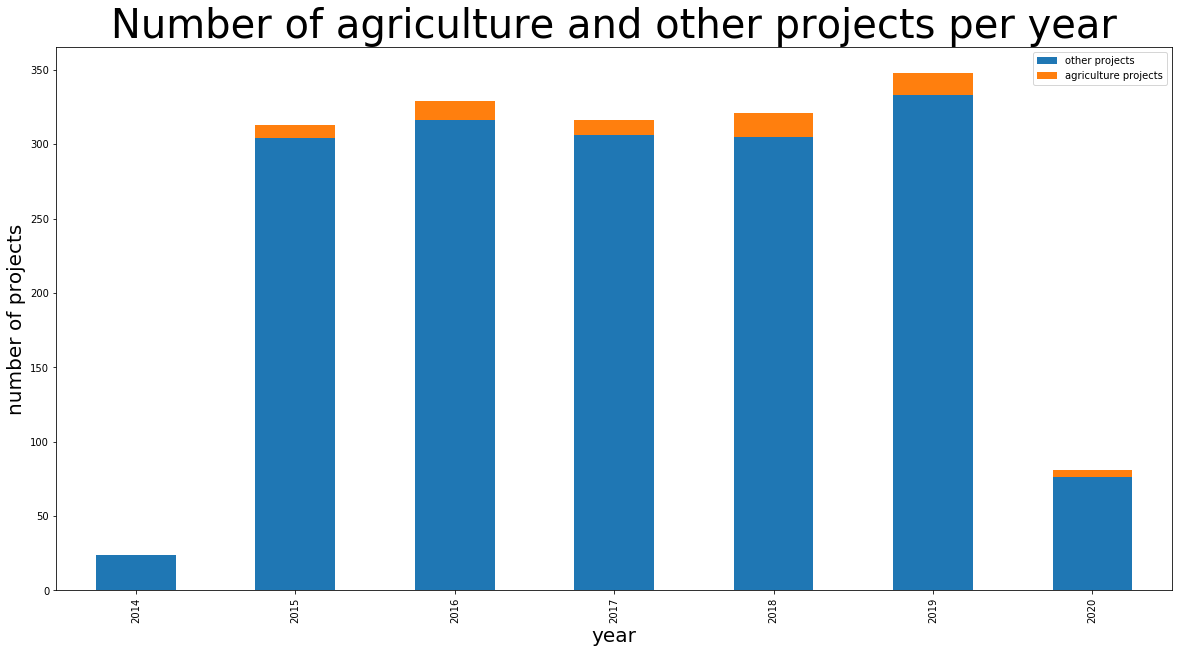

In [73]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

data_funding.groupby(['First_year','agricultur_fund_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('number of projects', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other projects')
L.get_texts()[1].set_text('agriculture projects')
plt.title('Number of agriculture and other projects per year', fontsize = 40)

#plt.savefig('C:/Users/Lina_/Documents/GitHub/agritech-policy-data-analysis/Graphics/Laws_total_divided_per_year.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


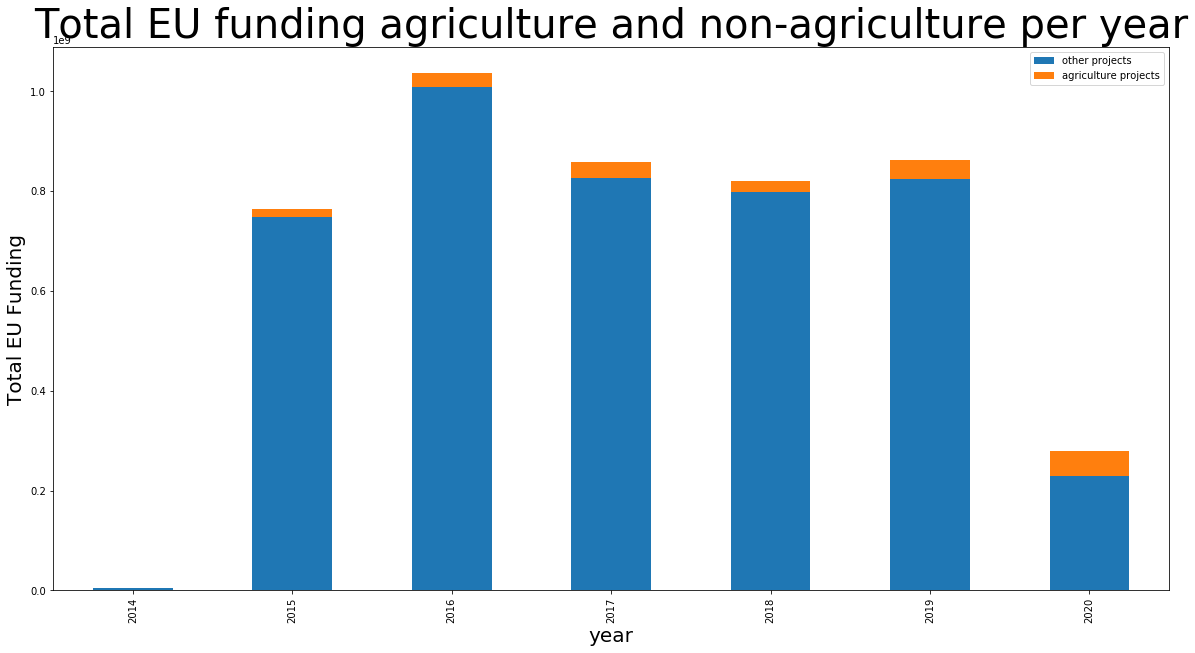

In [83]:
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

data_funding.groupby(['First_year','agricultur_fund_yes']).agg({'ecMaxContribution':'sum'}).unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('Total EU Funding', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other projects')
L.get_texts()[1].set_text('agriculture projects')
plt.title('Total EU funding agriculture and non-agriculture per year', fontsize = 40)

plt.savefig('graphics/Funding_total_divided_per_year.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot